### Background:

The Black-Scholes model is used to calculate the theoretical price of European-style options. The model assumes that the price of the underlying asset follows a geometric Brownian motion with constant drift and volatility.

The Black-Scholes formula for a European call option price $C$ and put option price $P$ is given by:

$$
C = S_0 \cdot N(d_1) - X \cdot e^{-rT} \cdot N(d_2)
$$

$$
P = X \cdot e^{-rT} \cdot N(-d_2) - S_0 \cdot N(-d_1)
$$

where:

$$
d_1 = \frac{\ln\left(\frac{S_0}{X}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

- $S_0$ = Current price of the underlying asset  
- $X$ = Strike price of the option  
- $r$ = Risk-free interest rate (annualized)  
- $\sigma$ = Volatility of the underlying asset's returns (annualized)  
- $T$ = Time to maturity in years  
- $N(\cdot)$ = Cumulative distribution function of the standard normal distribution

### Objective:
Develop a Python program that calculates the price of a European call and put option using the Black-Scholes model.

In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

he objective is to approximate the **Cumulative Distribution Function (CDF)** of the **standard normal distribution** and compare this approximation to the exact CDF provided by **SciPy**.

The CDF of the standard normal distribution, often denoted as $\Phi(x)$, is defined as the probability that a standard normal random variable $X$ is less than or equal to $x$:

$$
\Phi(x) = P(X \leq x)
$$

In terms of probability, this represents the area under the standard normal curve from $-\infty$ to $x$.

Since the exact CDF of the normal distribution does not have a closed-form solution, it must be numerically approximated or computed via special functions like the **error function (erf)**.

#### Custom Approximation for the CDF:
The custom function $N(x)$ provides an approximation of $\Phi(x)$ using the following formula:

$$
N(x) = \frac{1 + \text{sign}(x) \cdot \sqrt{1 - \exp\left(-x^2 \cdot \frac{2}{\pi} \cdot \frac{1}{1 + 0.2316419 |x|}\right)}}{2}
$$

Breaking this down:
- **$\text{sign}(x)$**: This returns $+1$ if $x > 0$ and $-1$ if $x < 0$. This is used to handle the symmetry of the normal distribution.
- **$\exp(-x^2)$**: The exponential decay term ensures that the approximation correctly approaches 0 as $x \to -\infty$ and 1 as $x \to \infty$.
- **Square root and constants**: The square root and constant terms help to adjust the rate at which the approximation converges, fine-tuning the shape of the curve to match the CDF.

The function returns values between 0 and 1, consistent with the behavior of any CDF.

#### Exact CDF from SciPy:
The exact CDF is computed using **SciPy's** `scipy.stats.norm.cdf(x)`. This utilizes the error function $\text{erf}(x)$, which is related to the standard normal CDF by:

$$
\Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)
$$

In [2]:
def N(x):
	return (1.0 + np.sign(x) * np.sqrt(1.0 - np.exp(-x**2 * (2.0 / np.pi) / (1.0 + 0.2316419 * abs(x))))) / 2.0

#### Visual Comparison:
We evaluate both the custom approximation $N(x)$ and the exact CDF $\Phi(x)$ over a range of values for $x$ between -4 and 4, which covers most of the probability mass for a standard normal distribution (about 99.99%).

This visual comparison shows how well the custom approximation $N(x)$ aligns with the exact CDF $\Phi(x)$. While the exact CDF from SciPy is more accurate, the approximation provides a fast, computationally efficient method for approximating the CDF over a broad range of values.

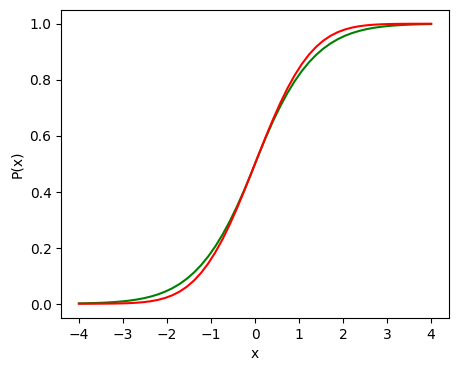

In [17]:
x = np.linspace(-4, 4, 50)
fig=plt.figure(figsize=(5,4))
xy = fig.add_subplot()
xy.plot(x, N(x), color="green")
xy.plot(x, scipy.stats.norm.cdf(x), color="red")
xy.set_xlabel('x')
xy.set_ylabel('P(x)')
plt.show()

#### The Python Implementation:
The Python code implements the Black-Scholes model using the equations above. The function `bs` is defined to calculate the price of either a call or a put option, based on whether the `type` argument is set to `"call"` or `"put"`.

- $C$ and $P$ are the prices of the call and put options, respectively.
$$
C = S_0 \cdot N(d1) - X \cdot e^{-rT} \cdot N(d2)
$$
$$
P = X \cdot e^{-rT} \cdot N(-d2) - S_0 \cdot N(-d1)
$$
- $N(\cdot)$ is the cumulative distribution function (CDF) of the standard normal distribution.
- $d_1$ and $d_2$ are intermediate terms that adjust the pricing for volatility and the time to maturity, given by:
$$
d1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}
$$

$$
d2 = d1 - \sigma \sqrt{T}
$$

In [4]:
def bs(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	d2 = d1 - vol * np.sqrt(T)

	return s*N(d1)-k*np.exp(-r*T)*N(d2) if type == "call" else k*np.exp(-r*T)*N(-d2)-s*N(-d1)

Where:
- $S$ is the current stock price.
- $K$ is the strike price of the option.
- $r$ is the risk-free interest rate (annualized).
- vol ($\sigma$) is the volatility of the underlying asset's returns (annualized).
- $T$ is the time to maturity (in years).

In [5]:
s = 100
k = 100
r = 0.05
vol = 0.25
T = 1

### Put-Call Parity

In options pricing, **Put-Call Parity** defines a fundamental relationship between the prices of European **call** and **put** options. The parity relationship helps to ensure that no arbitrage opportunities exist in the market.

The Put-Call Parity formula is expressed as:

$$
C - P = S - K e^{-rT}
$$

In [6]:
c = bs("call", s, k, r, vol, T)
p = bs("put", s, k, r, vol, T)
print("Call price: ", c)
print("put price: ", p)

print("call put parity: ", "c-p = ",c - p," s-k*exp(-rT) = ", s - (k * np.exp(-r*T)))

Call price:  11.929828349661719
put price:  7.052770799733132
call put parity:  c-p =  4.877057549928587  s-k*exp(-rT) =  4.877057549928594


### Exploring Option Price Sensitivity to Strike Price and Volatility
The goal of this analysis is to observe how the price of a European **call option** changes as a function of two key variables: the **strike price** and the **volatility** of the underlying asset. By fixing other parameters of the Black-Scholes model (such as time to maturity and risk-free rate), we can explore how option prices evolve across different strikes and volatilities.

1. **Range of Strike Prices**:
   We generate a range of **strike prices** ($K$) around the current spot price, between $S_0 - 20$ and $S_0 + 20$. This allows us to see how options are priced both in-the-money (lower strikes) and out-of-the-money (higher strikes).
2. **Range of Volatilities**:
   We vary the **volatility** ($\sigma$) to see how increasing or decreasing market uncertainty impacts option prices.
3. **Meshgrid**:
   This provides all combinations of the two variables.
4. **Calculate Option Price**:
   Using the Black-Scholes model, we compute the option price for each combination of strike price and volatility. We fix the other parameters ($0 = 100$, $r = 0.05$, $T = 1$) and calculate the call option price at each pair of $(K, \sigma)$.

In [7]:
strikes = np.linspace(k-20, k+20,40)
volatilities = np.linspace(vol-0.2, vol+0.6, 40)

pstrike, pvol = np.meshgrid(strikes, volatilities)

callPrices = bs("call", pstrike, k, r, pvol, T)
putPrices  = bs("put", pstrike, k, r, pvol, T)

**Visualisation**:
- The X-axis represents the strike prices.
- The Y-axis represents the volatilities.
- The Z-axis represents the calculated call option prices from the Black-Scholes model.

The 3D surface plot provides a visual representation of how option prices change as both the strike price and volatility vary.

**Insights**:

Strike Price ($K$): As the strike price increases, the value of a call option decreases. This is expected because the option becomes less likely to be exercised profitably when the strike is much higher than the current spot price.

Volatility ($\sigma$): Higher volatility generally increases the price of the call option. This is because higher volatility increases the probability of larger price movements in the underlying asset, which benefits call option holders.

Surface Behavior: The surface plot provides an intuitive understanding of how the interaction between strike price and volatility affects the option price. For low strike prices and high volatility, the call option price is highest, indicating a favorable situation for the option holder.

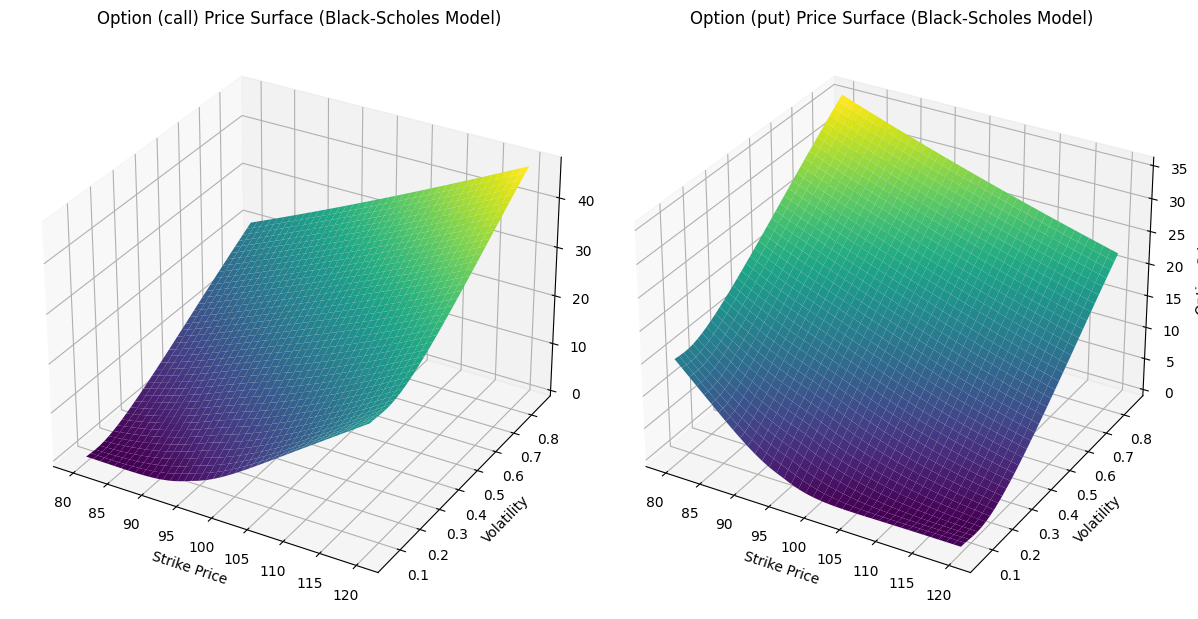

In [8]:
fig = plt.figure(figsize=(12, 7))

ax = fig.add_subplot(121, projection='3d')
bx = fig.add_subplot(122, projection='3d')

ax.plot_surface(pstrike, pvol, callPrices, cmap='viridis')
bx.plot_surface(pstrike, pvol, putPrices, cmap='viridis')

ax.set_xlabel('Strike Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Option Price')
ax.set_title('Option (call) Price Surface (Black-Scholes Model)')

bx.set_xlabel('Strike Price')
bx.set_ylabel('Volatility')
bx.set_zlabel('Option Price')
bx.set_title('Option (put) Price Surface (Black-Scholes Model)')
plt.tight_layout()
plt.show()

In [9]:
def delta(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	return N(d1) if type == "call" else -N(d1)

In [10]:
print("Delta Call :", delta("call", s, k, r, vol, T), "Delta Put :", delta("put", s, k, r, vol, T))

Delta Call : 0.6231055497912004 Delta Put : -0.6231055497912004


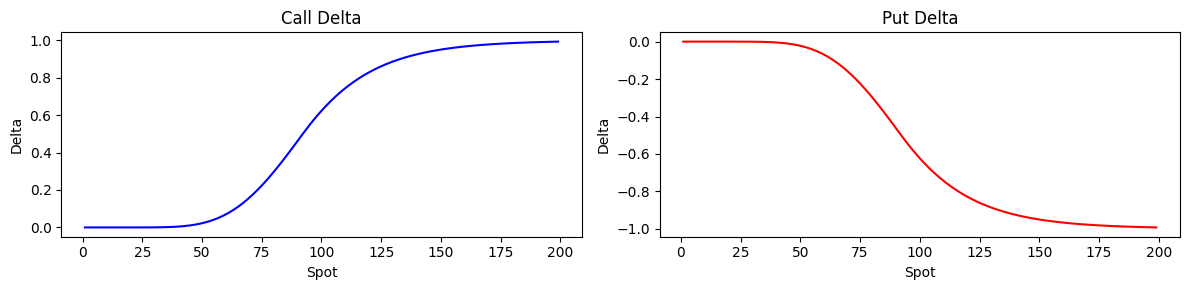

In [11]:
spots = np.linspace(1, 199, 100)

fig=plt.figure(figsize=(12, 3))

xy1 = fig.add_subplot(121)
xy1.plot(spots, delta("call", spots, k, r , vol, T), color="blue")
xy1.set_title('Call Delta')
xy1.set_xlabel('Spot')
xy1.set_ylabel('Delta')

xy2 = fig.add_subplot(122)
xy2.plot(spots, delta("put", spots, k, r , vol, T), color="red")
xy2.set_title('Put Delta')
xy2.set_xlabel('Spot')
xy2.set_ylabel('Delta')

plt.tight_layout()
plt.show()

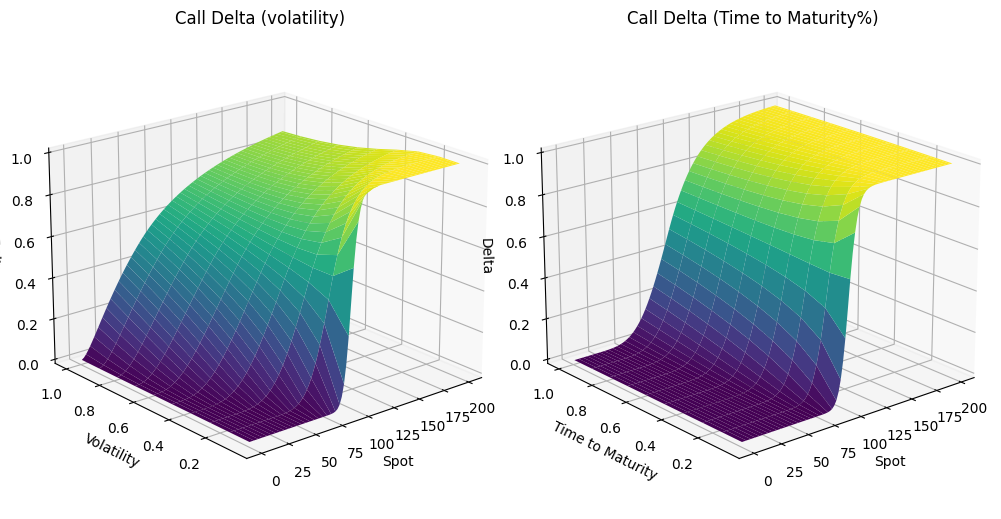

In [12]:
volatilities = np.linspace(0.05, 1, 10)
maturities = np.linspace(0.05, 1, 10)

pSpots, pVol = np.meshgrid(spots, volatilities)
pSpots, pExpiry = np.meshgrid(spots, maturities)

deltaCallsVol = delta("call", pSpots, k, r , pVol, T)
deltaCallsExpiry = delta("call", pSpots, k, r , vol, pExpiry)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(pSpots, pVol, deltaCallsVol, cmap='viridis')
ax.view_init(elev=20, azim=-130)
ax.set_xlabel('Spot')
ax.set_ylabel('Volatility')
ax.set_zlabel('Delta')
ax.set_title('Call Delta (volatility)')

bx = fig.add_subplot(122, projection='3d')
bx.plot_surface(pSpots, pExpiry, deltaCallsExpiry, cmap='viridis')
bx.view_init(elev=20, azim=-130)
bx.set_xlabel('Spot')
bx.set_ylabel('Time to Maturity')
bx.set_zlabel('Delta')
bx.set_title("Call Delta (Time to Maturity%)")

plt.tight_layout()
plt.show()

In [ ]:
def gamma(type, s, k, r, vol, T):
	d1 = (np.log(s/k) + (r+(vol**2)/2) * T)/(vol*(np.sqrt(T)))
	return N(d1) if type == "call" else -N(d1)